# Mines Probabilities Calculator

In [1]:
from math import sqrt, comb
import matplotlib.pyplot as plt
import scipy.stats as stats
from utils import load_payouts

## Expected PnL (or returns)

In this game we can choose the amount of mines to be placed on the board and the amount of diamonds to find before cashing out. We want to find the streategy that maximizes the expected returns or PnL.

The payouts table is known and we denote the payout of winning by choosing $d$ diamonds in a board with $m$ mines by $P_{d,m}$

Given a strategy with $d$ diamonds and $m$ mines, the probability of winning a game is given by

$$p_{d,m}=\frac{{25 - m\choose d}}{{25\choose d}}$$

That is, the ways I can choose $d$ diamonds from the empty cells over the total ways to choose diamonds. We define the random variable $\operatorname{PnL_{d,m}}$ as follows:

$$\mathbb{P}(\operatorname{PnL_{d,m}}=-1)=1-p_{d,m},\quad \mathbb{P}(\operatorname{PnL_{d,m}}=P_{d,m}-1)=p_{d,m}$$

The expected PnL of this strategy is then given by

$$\mathbb{E}[\operatorname{PnL}_{d,m}]=p_{d,m}\cdot (P_{d,m} - 1) - 1\cdot (1-p_{d,m})=p_{d,m}\cdot P_{d,m} - 1$$

We want to look for the game strategy that maximizes this value.

**Note:** We can also define $\operatorname{PnL}_{d,m}=P_{d,m}\cdot X-1$ where $X\sim\text{Ber}(p_{d,m})$

In [2]:
def win_probability(n_mines, n_diamonds):
    """
    Calculate the probability of finding n_diamonds in a field with n_mines and 25 total cells
    """
    # Calculate the number of ways to choose n_diamonds from n_empty_cells
    ways_to_choose_diamonds = comb(25 - n_mines, n_diamonds)

    # Calculate the total number of ways to choose n_diamonds from total_cells
    total_ways = comb(25, n_diamonds)

    # Calculate and return the probability
    return ways_to_choose_diamonds / total_ways

In [3]:
def expected_pnl(payout, n_mines, n_diamonds):
    """
    Calculate expected PnL of finding n_diamonds in a field with n_mines and 25 total cells
    """
    p = win_probability(n_mines, n_diamonds)
    return payout * p - 1, p

In [4]:
def find_best_pnl(payouts):
    """
    Finds the strategy with the best PnL
    """
    best_pnl = float('-inf')
    best_n_mines = None
    best_n_diamonds = None
    best_p = None

    for diamonds, v in payouts.items():  # n_diamonds
        for mines, payout in v.items():  # n_mines
            pnl, p = expected_pnl(payout, int(mines), int(diamonds))
            if pnl > best_pnl:
                best_pnl = pnl
                best_n_mines = int(mines)
                best_n_diamonds = int(diamonds)
                best_p = p

    return best_n_mines, best_n_diamonds, best_pnl, best_p

In [27]:
payouts = load_payouts()

m, d, pnl, p = find_best_pnl(payouts)
payout = payouts[str(d)][str(m)]

print(f"Best strategy: {m} mines and {d} diamonds")
print(f"Expected PnL: {pnl:.4f}")
print(f"Probability of winning each game: {p * 100:.4f}%")
print(f"Win payout: {payout}")

Best strategy: 11 mines and 5 diamonds
Expected PnL: 0.0087
Probability of winning each game: 3.7681%
Win payout: 26.77


Is this the only strategy with positive PnL?

In [28]:
def all_pnl(payouts):
    pnl_dict = {}
    for diamonds, v in payouts.items():
        for mines, payout in v.items():
            pnl_dict[(diamonds, mines)], _ = expected_pnl(payout, int(mines), int(diamonds))

    return pnl_dict

In [29]:
pnls = all_pnl(payouts)

pnls = sorted(pnls.items(), key=lambda x: x[1], reverse=True)
print([pnls[i] for i in range(len(pnls)) if pnls[i][1]>0])

[(('5', '11'), 0.008724637681159386)]


In [30]:
print(pnls)

[(('5', '11'), 0.008724637681159386), (('1', '2'), -0.00639999999999985), (('2', '1'), -0.00639999999999985), (('2', '3'), -0.006699999999999928), (('3', '2'), -0.006699999999999928), (('1', '8'), -0.007199999999999984), (('8', '1'), -0.007199999999999984), (('1', '9'), -0.007999999999999896), (('9', '1'), -0.007999999999999896), (('1', '5'), -0.008000000000000007), (('5', '1'), -0.008000000000000007), (('2', '6'), -0.008200000000000096), (('6', '2'), -0.008200000000000096), (('3', '5'), -0.008695652173912993), (('5', '3'), -0.008695652173912993), (('1', '11'), -0.008799999999999919), (('1', '18'), -0.008799999999999919), (('11', '1'), -0.008799999999999919), (('18', '1'), -0.008799999999999919), (('1', '4'), -0.008800000000000141), (('4', '1'), -0.008800000000000141), (('3', '9'), -0.009043478260869486), (('9', '3'), -0.009043478260869486), (('3', '3'), -0.009043478260869597), (('9', '11'), -0.009277157087091092), (('3', '11'), -0.009286956521739165), (('11', '3'), -0.0092869565217391

## Should we participate in this game?



Using the strategy found before (11 mines and 5 diamonds), which has positive expected returns, we define $X_n\sim \text{Bin}(n, p_{5, 11})$ as the random variable representing the number of wins obtained by playing $n$ games following this strategy.
Thus, the PnL in this case is given by

$$\operatorname{PnL}^n_{5,11}=P_{5,11}\cdot X_n - n$$
and the expected PnL is given by
$$\mathbb{E}[\operatorname{PnL}^n_{5,11}]=P_{5,11}\cdot \mathbb{E}[X_n] - n=n\cdot p_{5,11}\cdot P_{5,11}-n=n\cdot \mathbb{E}[\operatorname{PnL}_{5,11}]$$

Clearly, the game has positive expected PnL, no matter how many games we decide to play. What interests us now is determining the probability of winning (or losing) money given that we play $n$ games, that is,

$$\mathbb{P}(\operatorname{PnL}^n_{5,11}<0)$$

**Note:** Notice that $\operatorname{PnL}^n_{d,m}=\sum_{i=1}^n (PnL_{d,m})_{i}$

In [8]:
def prob_losing(n, p, payout):
    """
    Calculates the probability of losing money by playing n games with probability of winning p and payout
    """
    return sum([stats.binom.pmf(n=n, k=k, p=p) for k in range(n + 1) if payout * k - n < 0])

Plot the probability of losing in terms of $n$.

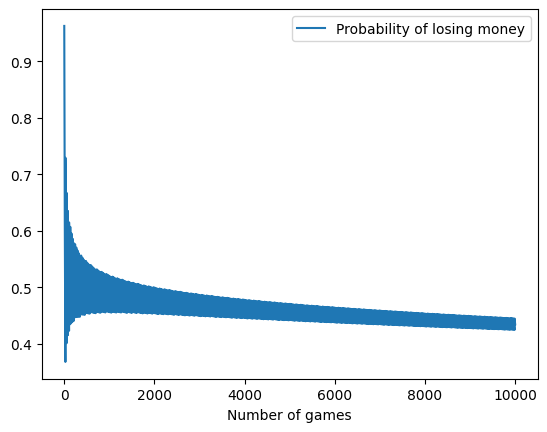

In [9]:
y = [prob_losing(n, p, payout) for n in range(1, 10000)]
x = [n for n in range(1, 10000)]

plt.plot(x, y, label="Probability of losing money")
plt.xlabel("Number of games")
plt.legend()

plt.show()

In [10]:
y.index(min(y)), min(y)

(25, np.float64(0.3683780158754935))

## Central Limit Theorem

We want to compute the probability of losing for large values on $n$ and when $n\to\inf$

We have,

$$\begin{align*}
\operatorname{Var}(\operatorname{PnL}_{d,m})&=\operatorname{Var}(P_{d,m}\cdot X-1)\\
&=P_{d,m}^2\operatorname{Var}(X)\\
&=P_{d,m}^2\cdot p_{d,m}\cdot(1-p_{d,m})
\end{align*}$$

By the central limit theorem, 

$\operatorname{PnL}^n_{d,m}=\sum_{i=1}^n (PnL_{d,m})_{i}\overset{\cdot}{\sim}\mathcal{N}(n\cdot (p_{d,m}\cdot P_{d,m} - 1), n\cdot p_{d,m}\cdot(1-p_{d,m})\cdot P_{d,m}^2)$

Then,

$$\begin{align*}
\mathbb{P}(\operatorname{PnL}^n_{d,m}<0)&\approx \Phi\left(\frac{n\cdot (1-p_{d,m}\cdot P_{d,m})}{P_{d,m}\sqrt{n\cdot p_{d,m}\cdot(1-p_{d,m})}}\right)\\
&=\Phi\left(\frac{\sqrt{n}(1-p_{d,m}\cdot P_{d,m})}{P_{d,m}\sqrt{p_{d,m}\cdot(1-p_{d,m})}}\right)
\end{align*}$$

Where $\Phi$ is CDF of a standard normal distribution. Because the strategy has positive expected value, $1-p_{d,m}\cdot P_{d,m}<0$ and
$$\begin{align*}
\lim_{n\to\infty} \mathbb{P}(\operatorname{PnL}^n_{d,m})&=\lim_{n\to\infty} \Phi\left(\frac{\sqrt{n}(1-p_{d,m}\cdot P_{d,m})}{P_{d,m}\sqrt{p_{d,m}\cdot(1-p_{d,m})}}\right)\\
&=\Phi\left(\lim_{n\to\infty} \frac{\sqrt{n}(1-p_{d,m}\cdot P_{d,m})}{P_{d,m}\sqrt{p_{d,m}\cdot(1-p_{d,m})}}\right)\\
&=\Phi(-\infty)\\
&=0
\end{align*}$$

as expected.

In [11]:
def clt_prob_losing(n, p, payout):
    return stats.norm.cdf(0, loc=n * (p * payout - 1), scale=sqrt(n * p * (1-p)) * payout)

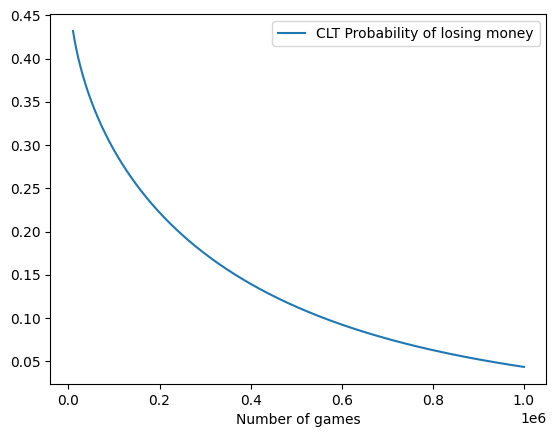

In [12]:
y_clt = [clt_prob_losing(i, p, payout) for i in range(10000, 1000000)]
x_clt = range(10000, 1000000)

plt.plot(x_clt, y_clt, label="CLT Probability of losing money")
plt.xlabel("Number of games")

plt.legend()

plt.show()

## How many games should we play?

Given a probability $q$, we are interested in determining the amount of games $n$ that we should play so that 
$$\begin{align*}
\mathbb{P}(\operatorname{PnL}_{d,m}^n <0) \leq q&\iff \Phi\left(\frac{\sqrt{n}(1-p_{d,m}\cdot P_{d,m})}{P_{d,m}\sqrt{p_{d,m}\cdot(1-p_{d,m})}}\right)\leq q\\
&\iff \frac{\sqrt{n}(1-p_{d,m}\cdot P_{d,m})}{P_{d,m}\sqrt{p_{d,m}\cdot(1-p_{d,m})}}\leq \Phi^{-1}(q)\\
&\iff \sqrt{n}\geq \Phi^{-1}(q)\frac{P_{d,m}\sqrt{p_{d,m}\cdot(1-p_{d,m})}}{1-p_{d,m}\cdot P_{d,m}}\\
&\iff n\geq \frac{(\Phi^{-1}(q)\cdot P_{d,m})^2(p_{d,m}\cdot (1-p_{d,m}))}{(1-p_{d,m}\cdot P_{d,m})^2}
\end{align*}$$

In [13]:
def clt_games_to_play(q, p, payout):
    return int(((stats.norm.ppf(q) * payout) / (1 - p * payout))**2 * (p * (1- p))) + 1

In [14]:
probs = [0.3, 0.2, 0.1, 0.05, 0.01, 0.001]

games_to_play = [clt_games_to_play(q, p, payout) for q in probs]

for prob, games in zip(probs, games_to_play):
    print(f"Games needed to play to lose with probability <{prob*100:.1f}%: {games}")

Games needed to play to lose with probability <30.0%: 93880
Games needed to play to lose with probability <20.0%: 241813
Games needed to play to lose with probability <10.0%: 560683
Games needed to play to lose with probability <5.0%: 923634
Games needed to play to lose with probability <1.0%: 1847543
Games needed to play to lose with probability <0.1%: 3260074


## Conclusions

It seems odd that casinos would allow a game where there is a strategy which loses them money on the long run. I am skeptical of my results and think there must be an error somewhere (most likely in the payout table which I obtained from [here](https://www.reddit.com/r/Stake/comments/ssf33j/stake_mines_payout_list/) and [here](https://stakecommunity.com/topic/58218-payment-table-for-mines/)).

According to the [stake website](https://stake.com/casino/games/mines), the house as a 1% edge. That means, the correct payouts are given by:

$$\begin{align*}
\mathbb{E}[\operatorname{PnL}_{d,m}]&=-0.01\\
\iff p_{d,m}\cdot P_{d,m}-1&=-0.01\\
\iff P_{d,m}&=\frac{0.99}{p_{d,m}}
\end{align*}$$

**Note**: Upon further search, I found this [page](https://stakecommunity.com/topic/28457-mines-multiplier-and-win-chance/) where the probability is listed correctly. **Might** create an online casino account just to check it.

In [16]:
print(f"Correct payout with 1% house edge for {m} mines and {d} diamonds: {0.99/p:.2f} instead of {payout}")

Correct payout with 1% house edge for 11 mines and 5 diamonds: 26.27 instead of 26.77
